# Zalando - Exercise

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset — often used as the "Hello, World" of deep learning programs for computer vision. As you know from the previous Notebook The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.).

Now we are using the Fashion MNIST for variety because it's a slightly more challenging problem than regular MNIST.

<img src="./resources/fashion-mnist-sprite.png"  style="height: 500px"/>

Now you will build an Neural Network to do the Fashion MNIST classification yourself. This will be very similar to the MNIST classification. But at the end we will finetune some parameters of our network. That's when it becomes really interesting.

As you can see, the images we are using are still very small. In the next lesson we will be using a CNN, a network specially designed for image classification. We will use more realistic images as well.

## 1. Import packages and classes

You can access the Fashion MNIST directly from TensorFlow. So first import all the packages needed for TensorFlow and Keras.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## 2. Import the Fashion MNIST dataset

Import and load the Fashion MNIST data (`fashion_mnist`) directly from TensorFlow.

In [5]:
mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


## 3. Explore the data

Explore the format of the dataset before training the model. How many images are there in the training set. What size are the images?

In [6]:
train_images.shape


(60000, 28, 28)

How many training labels are there in the dataset?

In [7]:

len(train_labels)

60000

Can you print some training labels?

In [8]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

As you see, the train_labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<table>
    <tr><th>Label</th><th>Class</th></tr>
    <tr><td>0</td><td>T-shirt/top</td></tr>
    <tr><td>1</td><td>Trouser</td></tr>
    <tr><td>2</td><td>Pullover</td></tr>
    <tr><td>3</td><td>Dress</td></tr>
    <tr><td>4</td><td>Coat</td></tr>
    <tr><td>5</td><td>Sandal</td></tr>
    <tr><td>6</td><td>Shirt</td></tr>
    <tr><td>7</td><td>Sneaker</td></tr>
    <tr><td>8</td><td>Bag</td></tr>
    <tr><td>9</td><td>Ankle boot</td></tr>
</table>

Each image is mapped to a single label. Since the class names are not included in the dataset, we store them here to use later when plotting the images:

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 4. Preprocess the data

The data must be preprocessed before training the network. If you inspect a random image in the training set, you will see that the pixel values fall in the range of 0 to 255. Print for example the fifth image.

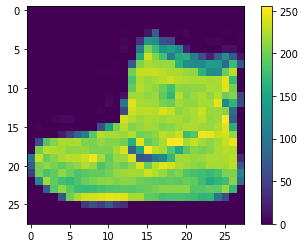

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


We scale these values to a range of 0 to 1 before feeding to the neural network model. Normalized pixel values make our network easier to train. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way. 

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0


First print the fifth image again.

Now display the first 25 images from the training set and __display the class name below each image. So for example we want *Dress* below the image and not *3*.__ Verify that the data is in the correct format and we're ready to build and train the network.

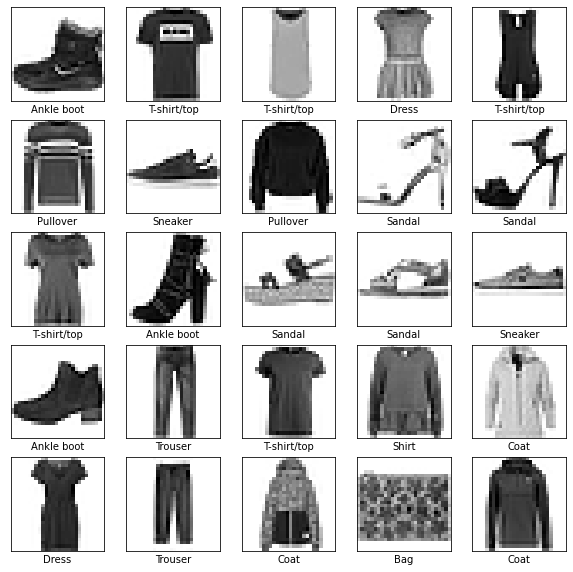

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## 5. Build the model

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. You may build a model that is equal to the model used in the previous Notebook.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


## 6. Compile the model

Before the model is ready for training, it needs a few more settings. Compile the model with the same settings as before.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 7. Train the model

Now train the model. Use 5 epochs for a start.

In [16]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 903us/step - loss: 0.4974 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.3727 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.3331 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.3103 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 2s 910us/step - loss: 0.2941 - accuracy: 0.8923


As the model trains, the loss and accuracy metrics are displayed. Can you see if you get the same accuracy as for the MNIST dataset?

## 8. Evaluate accuracy

The real challenge will be seeing how our model performs on our test data.

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 552us/step - loss: 0.3523 - accuracy: 0.8723
Test accuracy: 0.8723000288009644


In [ ]:
# accuracy on the train data? mnist:    - fashion_mnist:
# accuracy on the test data? mnist:    - fashion_mnist:

# What can you conclude?

## 9. Make predictions

With the model trained, we can use it to make predictions about the test images.

In [18]:
predictions = model.predict(test_images)


Here, the model has predicted the label for each image in the testing set. Take a look at the first prediction.

In [19]:
predictions[0]


array([6.9637036e-07, 6.8136923e-09, 4.2046075e-08, 4.3461178e-08,
       3.7242893e-07, 2.2932303e-03, 2.1834801e-06, 8.9828633e-03,
       2.1940673e-06, 9.8871839e-01], dtype=float32)

A prediction is an array of 10 numbers. Can you see which type of clothing has the highest confidence value. __Now print the class name with the highest possibility!__

In [23]:
class_names[np.argmax(predictions[0])]


'Ankle boot'

So the model is most confident that the first image is an ankle boot. Can you print the image to see if this is correct?

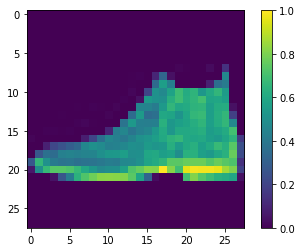

In [24]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Hooray! Once again well done!

## 10. Right or Wrong

Draw the first 25 __test images__ (5 images in a row). Below the image you print the actual value (a) and the predicted value (p). If they are the same the textcolor is green, red otherwise. Tune the subplot layout and create a little bit of space between the subplots. You should get something like this:

<img src="./resources/clothes.png"/>

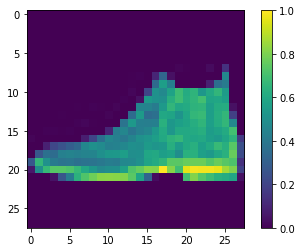

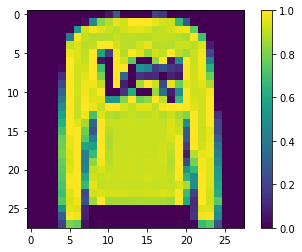

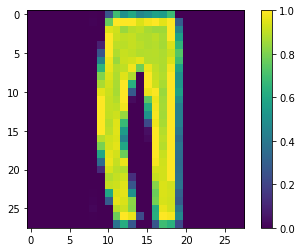

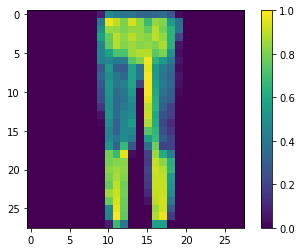

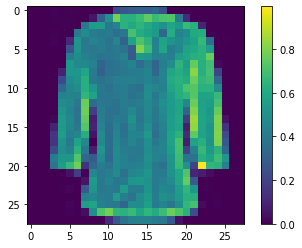

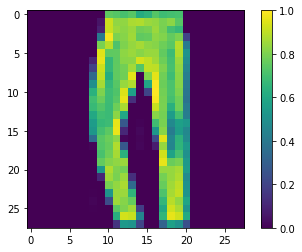

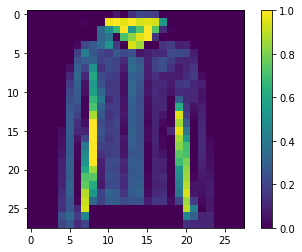

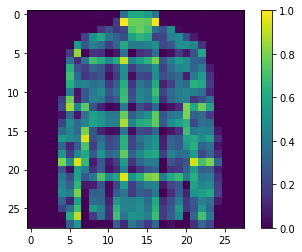

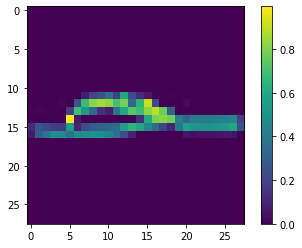

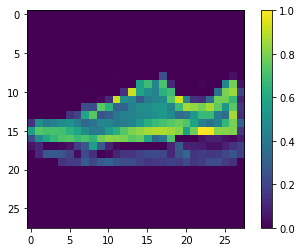

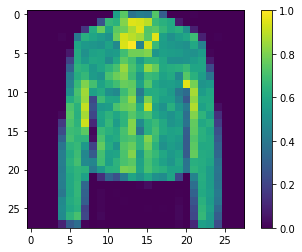

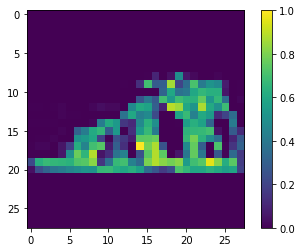

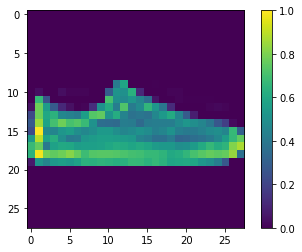

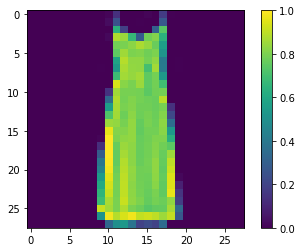

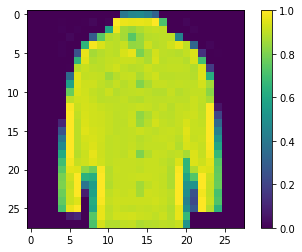

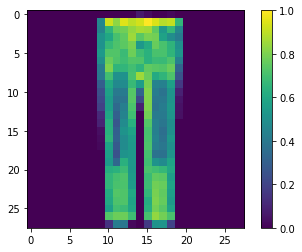

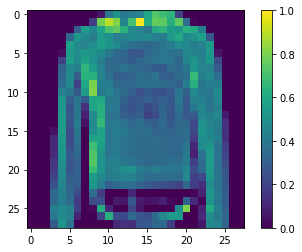

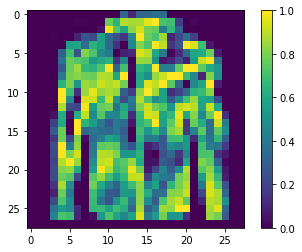

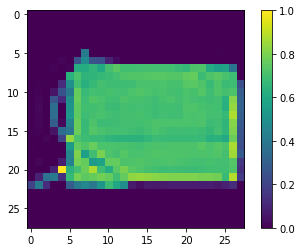

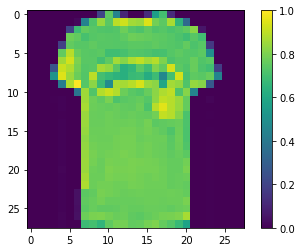

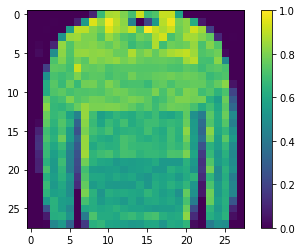

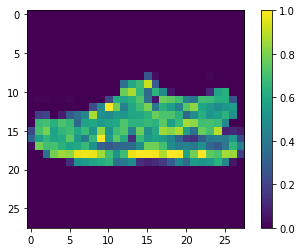

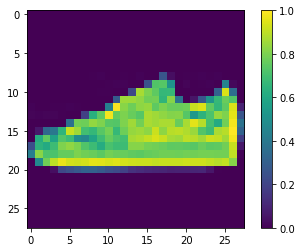

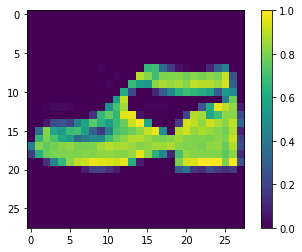

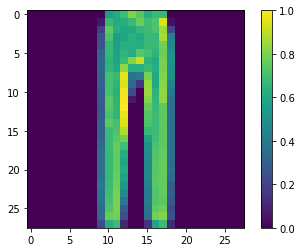

In [25]:
# Right or Wrong
for i in range(25):
    plt.figure()
    plt.imshow(test_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

## 11. Improve the network

What we’ve covered so far was but a brief introduction - there’s much more we can do to experiment with and improve this network.

### 11.1 Tuning Hyperparameters

Let's start with the batch size and number of epochs. First some Neural Network terminology:

- one epoch = One forward pass and one backward pass of all the training examples
- batch size = The number of training examples used in one forward/backward pass. The higher the batch size, the more memory space you'll need, the slower the training process will be.
- number of iterations = The number of passes, each pass using the batch size number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

First build and compile the model again and train it with the original code (use __10 epochs__ this time). See how long it takes to train the model (2s/epoch).

Afterwords build and compile the model and train it with the code below. Can you see the difference? How long does it take for one epoch? What about the accuracy?

In [26]:
model.fit(
  train_images,
  train_labels,
  epochs=10,
  batch_size=100,
)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2530 - accuracy: 0.9060
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2467 - accuracy: 0.9082
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.9112
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2370 - accuracy: 0.9118
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2289 - accuracy: 0.9141
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2238 - accuracy: 0.9162: 
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9189
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2104 - accuracy: 0.9217
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2065 - accuracy: 0.9226
Epoch 10/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2009 - accuracy: 0.92

### 11.2 Network Depth

What happens if we remove or add more fully-connected layers? How does that affect training and/or the model’s final performance?

Build, compile and train with the code below and check the accuracy on the training and test data. Are we doing better?

In [27]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

### 11.3 Activations

What if we use an activation other than ReLU, e.g. sigmoid?

In [28]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='sigmoid'),
  keras.layers.Dense(128, activation='sigmoid'),
  keras.layers.Dense(128, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax'),
])

### 11.4 Dropout

What if we tried adding Dropout layers, which are known to prevent overfitting? Dropout layers function by randomly eliminating some of the connections between the layers (0.25 means it drops 25% of the existing connections). Can you see that the accuracy of the train and test data are almost the same?

In [29]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(10, activation='softmax'),
])

### 11.5 Validation

We can also use the testing dataset for validation during training. Keras will evaluate the model on the validation set at the end of each epoch and report the loss and any metrics we asked for. This allows us to monitor our model’s progress over time during training, which can be useful to identify overfitting and even support early stopping.

The accuracy on the training set is `acc`, that on the test set is `val_acc`.

In [30]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
  train_images,
  train_labels,
  epochs=10,
  batch_size=64,
  validation_data=(test_images, test_labels)
)

Epoch 1/10
938/938 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.8229 - val_loss: 0.4224 - val_accuracy: 0.8468
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3701 - accuracy: 0.8674 - val_loss: 0.4008 - val_accuracy: 0.8537
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3319 - accuracy: 0.8791 - val_loss: 0.3997 - val_accuracy: 0.8508
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3071 - accuracy: 0.8857 - val_loss: 0.3769 - val_accuracy: 0.8597
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2915 - accuracy: 0.8919 - val_loss: 0.3725 - val_accuracy: 0.8687
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2768 - accuracy: 0.8962 - val_loss: 0.3445 - val_accuracy: 0.8751
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2630 - accuracy: 0.9001 - val_loss: 0.3273 - val_accuracy: 0.8823
Epoch 